<a href="https://colab.research.google.com/github/prachi735/simple_stock_prediction/blob/master/Quick_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the library needed to process and analyse data

In [0]:
# import basic libs
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

import math
import numpy as np


Getting last 10 years Apple stocks data from web data reader

In [0]:
# setting timeframe of 
start = datetime.datetime(2009,9,9)
end = datetime.datetime(2019,9,9)

In [4]:
df = web.DataReader("AAPL",'yahoo',start,end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002
2019-09-05,213.970001,211.509995,212.000000,213.279999,23913700.0,213.279999
2019-09-06,214.419998,212.509995,214.050003,213.259995,19362300.0,213.259995
2019-09-09,216.440002,211.070007,214.839996,214.169998,27309400.0,214.169998


# Rolling mean & Return Rate

Rolling mean is the average of last n days. It smoothens the data and reduces the noise. Since moving average follows trend and doesn't deviate from outside its resistence point it helps us remove outliers.

In [5]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail()

Date
2019-09-03    198.564745
2019-09-04    198.682279
2019-09-05    198.841507
2019-09-06    198.996962
2019-09-09    199.161318
Name: Adj Close, dtype: float64

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

In [0]:
# Adjusting the size of the matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8,7))

In [0]:
# Adjusting the style of matplotlib
style.use('ggplot')

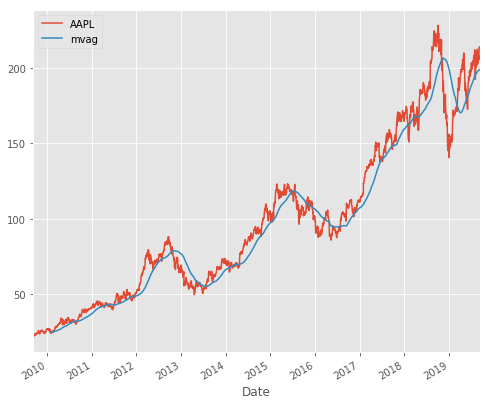

In [9]:
close_px.plot(label = 'AAPL')
mavg.plot(label = 'mvag')
plt.legend()

As we can see above moving average follows the trend of the stock movement. Below we plot the returns for the stock

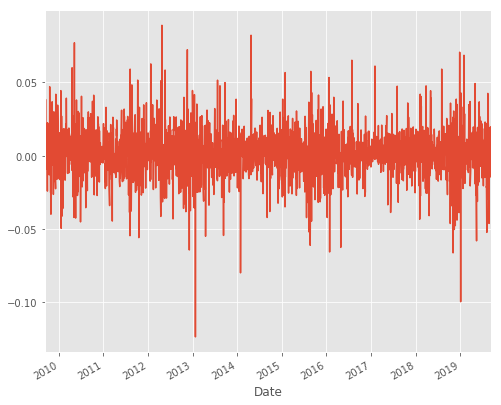

In [10]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label = 'return')

Based on the above plot we can take a call on buying/selling the stock, buying when stock retunrs are high like in 2012 & selling when returns are low like in 2013. 
But this could not be only reason to buy/sell stocks as it could be based on the sentiment of the market & competetion performance also.

#Correlation Analysis

To understand the performance of the stock , we should also look at how the competitiors of the company are performing. Here we get the data of big companies like Apple, GE, Google, IBM, Microsoft, and try to understance how one stock performs in relation to another or if they any sort of impact on each other.

In [11]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo'
                       ,start = start, end = end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2019-09-03,205.699997,8.321004,1168.390015,134.100006,136.039993
2019-09-04,209.190002,8.790497,1181.410034,136.320007,137.630005
2019-09-05,213.279999,8.800487,1211.380005,140.970001,140.050003
2019-09-06,213.259995,8.700594,1204.930054,140.570007,139.100006
2019-09-09,214.169998,8.950324,1204.410034,142.600006,137.520004


Let's get the correlation of the stocks to see if they impact each other in any way.

In [12]:
retscompt = dfcomp.pct_change()
corr = retscompt.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.323342,0.464324,0.388570,0.455066
GE,0.323342,1.000000,0.333243,0.436895,0.357438
GOOG,0.464324,0.333243,1.000000,0.405120,0.534393
IBM,0.388570,0.436895,0.405120,1.000000,0.484376
MSFT,0.455066,0.357438,0.534393,0.484376,1.000000


Let's plot Apple & GE stocks to see the correlation between them.

Text(0,0.5,'Returns GE')

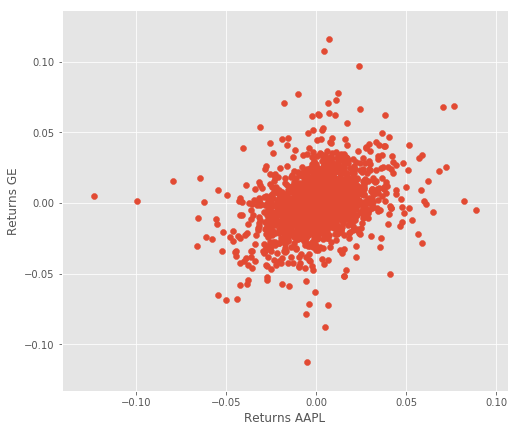

In [13]:
plt.scatter(retscompt.AAPL, retscompt.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

From plot we can see there is some positive correlation between the two stocks. Now let's see if this hold true for all the stocks. We will plot scatter matrix for all stocks & run a KDE along the diagonal. This will give general estimations of all distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94bac17e10>,
      dtype=object)

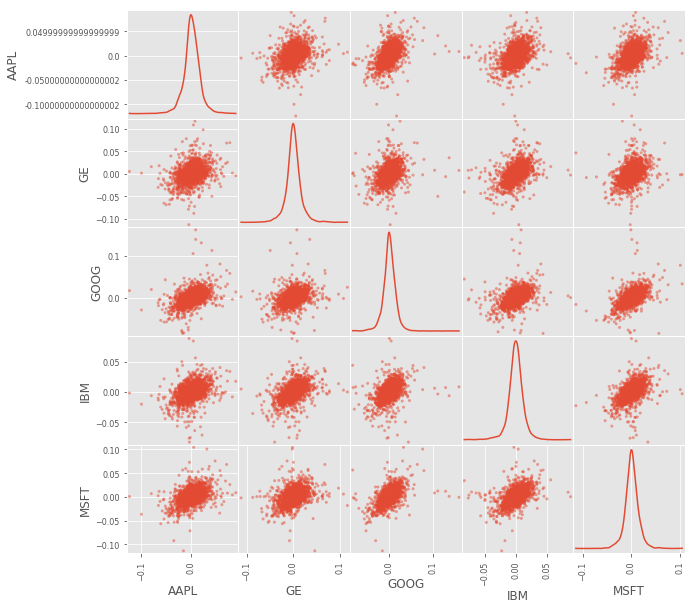

In [14]:
pd.plotting.scatter_matrix(retscompt, diagonal = 'kde', figsize=(10,10))

We see a small positive correlation among all stocks. We can verify this relationship using heatmaps as well. 

([<matplotlib.axis.YTick at 0x7f94ae584f50>,
 <a list of 5 Text yticklabel objects>)

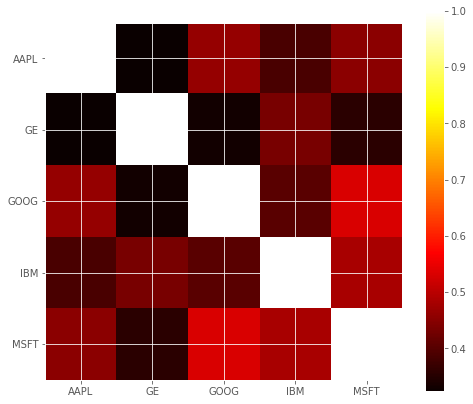

In [15]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

In the above heatmap lighter colors indicate higher correalation. Here we see many companies like apple, google have positive correlation, that indicates a trend in the industry.

Another useful comparision when buying/selling stocks is by lookig at stock's risk & returns. Below we plot the risk & return of a stock.  

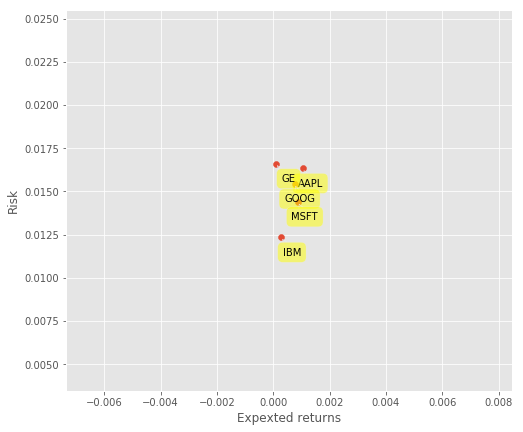

In [16]:
plt.scatter(retscompt.mean(), retscompt.std()) 
plt.xlabel('Expexted returns')
plt.ylabel('Risk')

for label, x, y in zip(retscompt.columns, retscompt.mean(), retscompt.std()):
  plt.annotate(
  label
  , xy = (x, y), xytext = (20, -20)
  ,textcoords = 'offset points', ha = 'right', va = 'bottom'
  , bbox = dict(boxstyle = 'round, pad=0.5', fc = 'yellow', alpha = 0.5)
  , arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad=0'))

By using above graph, we can identify stocks with less risk & high returns. Based on our risk apetite and expected returns we can decide which stocks to buy & which to sell.

#Predicting prices

Now that we have seen how to look at past data to help make decisions. Let's try to predict some future prices of a stock. If we can predict the future prices that would greatly help us in taking position of long/short of a stock.

#Feature Engineering

Here we are calculating High Low Percentage & Percent Change, based on High, Low, Open, & Close price. 

In [17]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-09-03,205.699997,20023000.0,1.341757,-0.353629
2019-09-04,209.190002,19188100.0,1.032549,0.383897
2019-09-05,213.279999,23913700.0,1.153417,0.603773
2019-09-06,213.259995,19362300.0,0.895622,-0.369077
2019-09-09,214.169998,27309400.0,2.507352,-0.311859


Let's import preprocssing package from sklearn to preprocess the data

In [0]:
from sklearn import preprocessing 

We perform below steps for preprocessing:


1.   Replace null with -999999
2.   Separate target variable from rest of the data
3.   Separate cross validation data from train data
4.   Scale X for same distribution for linear regression



In [0]:
# Drop missing values
dfreg.fillna(value=-999999, inplace=True)

# validation data
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label']= dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for 
# linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X
# (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]



# Model generation

Now that we have cleaned and preprocessed our data, let's generate a model to predict the stocks.

In [0]:
# import libs
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

Split data into test & train

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Simple Linear Analysis & Quadratic Discriminant Analysis

Below code applies linear regression model to predict by analysing simple linear relation between variables.

In [22]:
 # Linear regression
  clfreg = LinearRegression(n_jobs = -1)
  clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Below code applies quadratic discriminant analysis which is same as linear analysis except that the model allows polynomial and can predict non linear relationships.

In [23]:
   # Quadratic Regression 2
  clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
  clfpoly2.fit(X_train, y_train)
  
  
  # Quadratic Regressioon 3
  clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
  clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

Below code applies KNN regression where similar points are grouped together. The predictions of new points are made based on to which group new point belongs to.

In [24]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

# Evaluation

Now that we have applied various models let's evaluate the performance of each. Below we find the score of each model. Score is based on mean accuracy of the predictions.

In [25]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test, y_test)
confidencepoly3 = clfpoly3.score(X_test, y_test)
confidenceknn = clfknn.score(X_test, y_test)

print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

('The linear regression confidence is ', 0.9623289766752798)
('The quadratic regression 2 confidence is ', 0.9622684326237864)
('The quadratic regression 3 confidence is ', 0.9659792190044307)
('The knn regression confidence is ', 0.9512726405939848)


Here we see quadratic regression gives best result. Hence we select it for predictions.

In [26]:
forecast_set = clfpoly3.predict(X_lately)
dfreg['Forecast'] = np.nan
forecast_set

array([196.52692139, 181.60679938, 194.74705896, 198.29468698,
       200.52000054, 200.56876539, 200.86233831, 216.12264352,
       198.10132673, 200.63779219, 202.59135853, 206.51086597,
       205.55846968, 209.13662989, 208.12179211, 190.6237283 ,
       203.80860451, 197.73121419, 205.99616329, 206.87470003,
       205.56730827, 204.56534823, 207.58671574, 208.36055183,
       210.09008491, 208.16159958])

# Plot Prediction

Now that we have predictions lets plot them to see if they follow the same trend of past data.

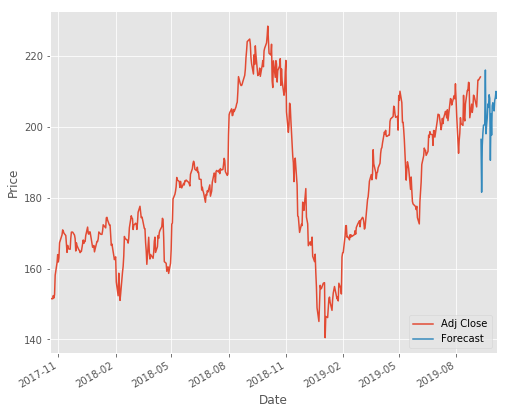

In [27]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days = 1)

for i in forecast_set:
  next_date = next_unix
  next_unix += datetime.timedelta(days =  1)
  dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
  
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


Above we see the downward trend is followed upward movement, similar to past data. We can buy the stock when stock is going down and sell when it goes up.